# __MOVIE RECOMMENDER SYSTEM__

### __INTRODUCTION__
In this exciting study, we explore the field of movie recommendations by utilizing the MovieLens dataset from the University of Minnesota's GroupLens research lab. The primary objective of our project is to create an advanced model that uses user ratings of previous films to suggest the top 5 movies to consumers. Throughout this presentation, we invite you to immerse yourself in the world of movie recommendations. We'll walk you through our model's intricacies, key findings, and demonstrate its prowess in suggesting movies tailored to individual tastes.

### __PROJECT OVERVIEW__
### __Business Understanding__
Movie Recommender Systems have evolved significantly over the years, playing a crucial role in enhancing user experience and driving business growth in the entertainment industry. Recommender systems date back to the late 20th century. In the early days, collaborative filtering was a prominent technique in which systems analyzed user behaviors and preferences to make recommendations. However, scalability and the cold-start problem (new items or users with limited data) were challenges. Content-based filtering emerged as an approach that considered item features and user preferences. Hybrid models, combining collaborative and content-based methods, gained popularity. Companies started integrating metadata like genre, director, and actor information to enhance recommendations.

Streaming platforms, such as Netflix, Hulu, and Amazon Prime Video, heavily rely on recommender systems. Personalization became a key business strategy, offering users tailored content suggestions based on their viewing history, ratings, and implicit feedback. While recommender systems offer numerous benefits, they also face challenges, including issues of bias, diversity, and privacy. Ensuring fair and unbiased recommendations has become a critical aspect of system development. The landscape continues to evolve with ongoing research in reinforcement learning, contextual recommendations, and explainability. Companies invest in AI research and development to stay competitive and enhance the overall user experience.

This movie recommendation system is designed to benefit the following stakeholders:

- Users: Movie enthusiasts seeking personalized movie suggestions based on their preferences and viewing history.
- Streaming Platform: The platform hosting the movie recommendation system, aiming to enhance user satisfaction and engagement.
- Content Providers: Movie studios and content creators interested in understanding user preferences and trends to optimize their content offerings.

### __Problem Statement__
Current systems frequently struggle with inadequate personalization, providing generic recommendations that do not correspond with the tastes of specific users. This gap leads to user annoyance and diminished engagement, diminishing the potential for streaming platforms to increase user pleasure. Second, because there is a widespread issue with cold starts, the algorithm performs poorly when it comes to new users or movies because there is insufficient history data to make initial recommendations accurately. It is critical to address these problems in order to create a recommendation system that appeals to consumers, changes with their tastes, and offers a varied and interesting viewing experience.

### __Objectives__
Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.

### __DATA UNDERSTANDING__
The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.
The data used in this project will be pulled from 4 different separate file:

*1. Movies Data (movies.csv):*
Contains movie information, including titles and genres with the following columns:
 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

*2. Links Data (links.csv):*
Provides identifiers for linking to external movie-related sources (IMDb, TMDb) and has the followinf columns:
* movieId: Unique identifier for each movie, consistent with other data files.
* imdbId: Identifier for movies used by IMDb (Internet Movie Database).
* tmdbId: Identifier for movies used by TMDb (The Movie Database).

*3. Ratings Data (ratings.csv):*
Contains user ratings on a 5-star scale for movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

*4. Tags Data (tags.csv):*
Contains user-generated metadata (tags) about movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



We will exclusively utilize the `movies.csv` dataset and the `ratings.csv` dataset for our analysis, as these two datasets encompass the necessary columns and information required for our project.

In [2]:
# A function to load, merge and give data summary
def load_and_examine(file_path_1, file_path_2):
    try:
        #Load the data
        df1 = pd.read_csv(file_path_1)
        df2 = pd.read_csv(file_path_2)
        data = pd.merge(df1, df2, on = "movieId" )
        
        #Display the shape, columns and first five rows of the dataset
        print("-" * 50, "Dataset Shape", "-" * 50)
        display(data.shape)
        print("-" * 50, "Dataset Columns", "-" * 50)
        display(data.columns)
        print("-" * 50, "Dataset Head", "-" * 50)
        display(data.head())
        
        #Display information about the dataset
        print("-" * 50, "Dataset Information", "-" * 50)
        display(data.info())

        return data
 
 
    except FileNotFoundError:
        print(f"File '{file_path_1}, {file_path_2}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
file_path_1 = "data/movies.csv"
file_path_2 = "data/ratings.csv"
data = load_and_examine(file_path_1, file_path_2)


-------------------------------------------------- Dataset Shape --------------------------------------------------


(100836, 6)

-------------------------------------------------- Dataset Columns --------------------------------------------------


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

-------------------------------------------------- Dataset Head --------------------------------------------------


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


-------------------------------------------------- Dataset Information --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None

### __DATA PREPARATION__

### __Missing Values__

In [3]:
# Checking for missing values in each column
missing_values = data.isna().sum()

for column, count in missing_values.items():
    print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


From the cell above, our dataset has no missing values.

### __Duplicate Values__

In [4]:
# Checking for duplicated rows
duplicated_rows = data.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


There are no duplicate values

### __Datatype Conversion__
The `timestamp` column was converted from int64 datatype to datetime64[ns].

In [5]:
#Converting 'timestamp' column to datetime type
data['timestamp'] = pd.to_datetime(data['timestamp'], unit = 's')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### __Feature Engineering__
In the following cell, we introduce two new columns, namely `hour` and `month`, to facilitate the examination of peak user engagement at different times of the day and across various months.

In [6]:
import calendar

data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
 6   hour       100836 non-null  int64         
 7   month      100836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.9+ MB


### __EXPLORATORY DATA ANALYSIS__

### __Rating Distribution__

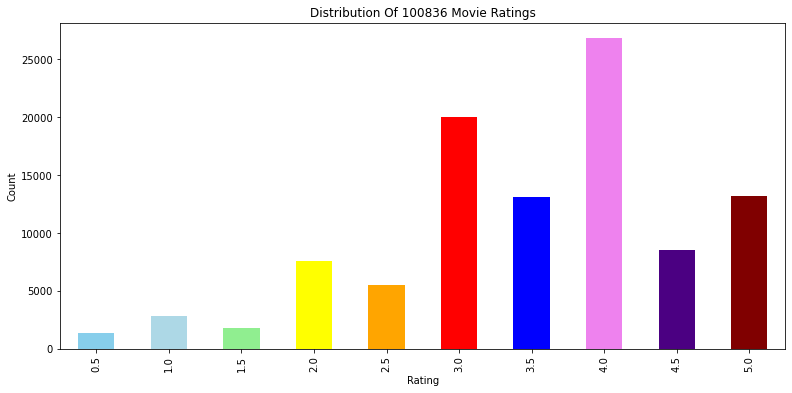

In [7]:
# count of each rating
rating_counts = data['rating'].value_counts().sort_index()

# colors for each bar
bar_colors = ['skyblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red', 'blue', 'violet', 'indigo','maroon', 'green']

# bar graph
plt.figure(figsize=(13, 6))
ax = rating_counts.plot(kind='bar', color=bar_colors)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution Of {} Movie Ratings'.format(data.shape[0]))
plt.show() 


Analyzing the distribution of movie ratings provides crucial insights into user sentiments and preferences within the movie recommendation system. The shape and spread of the distribution offer a snapshot of the user base's collective opinion, indicating whether the majority tends to rate movies positively or if opinions are more diverse. Peaks or clusters in the distribution highlight popular choices, shedding light on dominant genres or themes that resonate with users. Additionally, the distribution aids in evaluating the effectiveness of the recommendation system, as positive trends in recommended movie ratings suggest successful matches.  Overall, understanding the rating distribution is paramount for refining recommendations, identifying trends, and enhancing the user experience.

### __Average Hourly Rating__

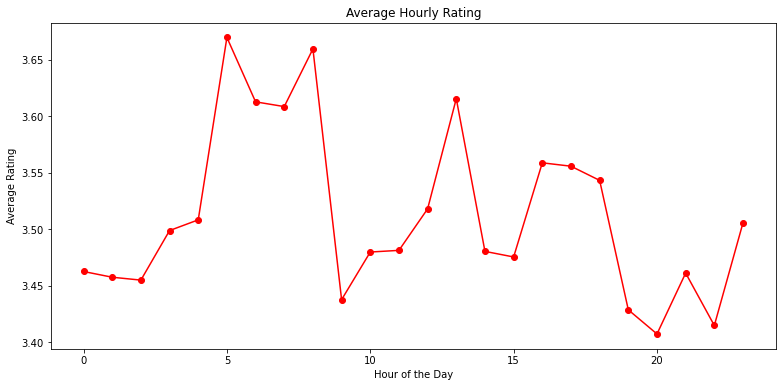

In [8]:
# Group by hour and calculate average rating
peak_viewing_times = data.groupby('hour')['rating'].mean()

# Plotting peak viewing time
plt.figure(figsize = (13, 6))
peak_viewing_times.plot(kind = 'line', marker = 'o', color = 'r', title = 'Average Hourly Rating')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.show()


The visualization above represents average hourly rating and it provides insights into the average ratings of movies across different hours of the day. This analysis can be crucial for stakeholders, such as streaming platforms, content creators, and advertisers, as it offers a nuanced understanding of user engagement patterns over time. By examining how ratings vary throughout the day, stakeholders can identify peak hours of user activity and tailor their strategies accordingly.

### __Monthly User Engagement__

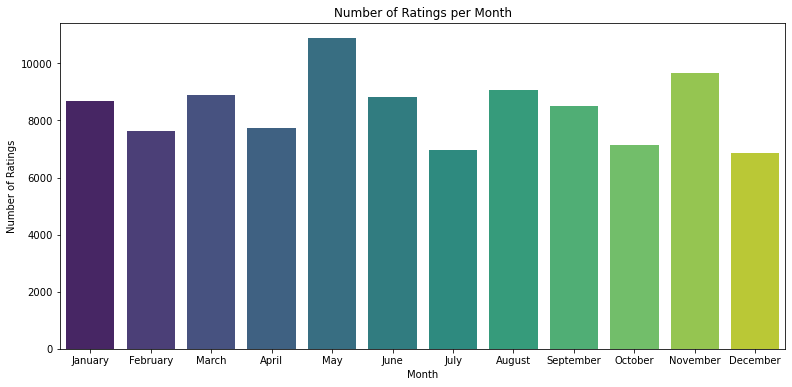

In [9]:
import calendar

data['month_name'] = data['month'].apply(lambda x: calendar.month_name[x])

# Define the order of months
month_order = list(calendar.month_name)[1:]

# Convert 'month_name' to categorical with the specified order
data['month_name'] = pd.Categorical(data['month_name'], categories=month_order, ordered=True)

# Group by month and calculate the number of ratings
monthly_ratings_count = data.groupby('month_name')['rating'].count()

# Plotting the number of ratings per month with seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=monthly_ratings_count.index, y=monthly_ratings_count.values, palette='viridis')
plt.title('Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.show()



The visualization above explores user engagement by examining the number of ratings per month over a long period from 1970 to 2018. It reveals distinct peaks in user activity during May and November, suggesting significant spikes in engagement during these months. The long-term analysis of user engagement, provides valuable insights to stakeholders regarding historical trends and patterns in user interaction with the platform. The pronounced peaks in user engagement during May and November over this extended period may indicate recurring seasonal trends or annual events that consistently capture users' attention. Stakeholders can leverage this information to strategically plan and optimize platform activities, such as content releases, promotions, or community engagement initiatives, around these historically high-engagement months. Understanding the temporal dynamics of user behavior allows stakeholders to align their efforts with periods of heightened user interest, enhancing the overall effectiveness of platform-related activities and potentially improving user satisfaction and loyalty.

### __Top 5 Genres and Percentage Ratio.__

In [10]:
# Checking different genres value count.

def find_genres(data):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # Dictionary to store different genre values

    for genre in data['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# Usage:
genre_count = find_genres(data)
genre_count

{'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Fantasy': 11834,
 'Romance': 18124,
 'Drama': 41928,
 'Action': 30635,
 'Crime': 16681,
 'Thriller': 26452,
 'Horror': 7291,
 'Mystery': 7674,
 'Sci-Fi': 17243,
 'War': 4859,
 'Musical': 4138,
 'Documentary': 1219,
 'IMAX': 4145,
 'Western': 1930,
 'Film-Noir': 870,
 '(no genres listed)': 47}

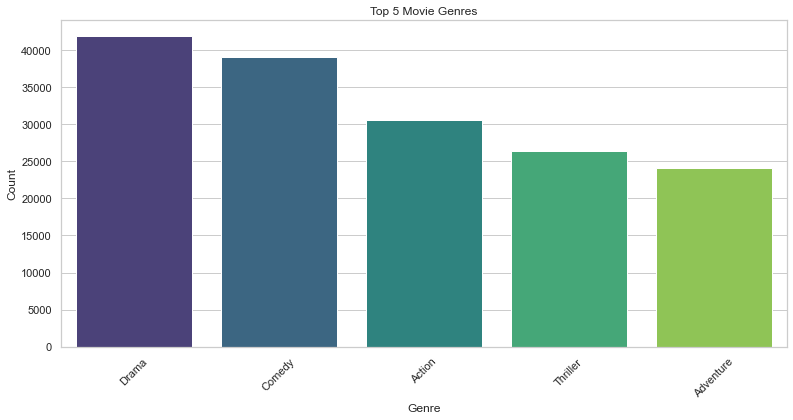

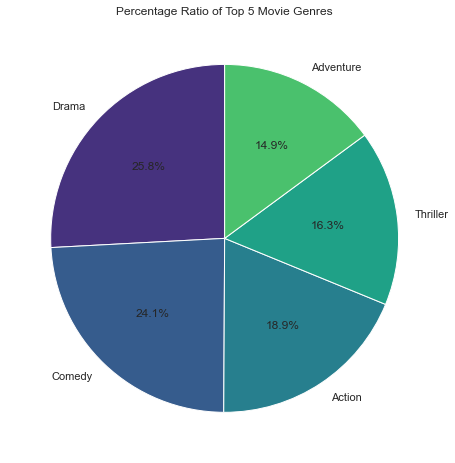

In [11]:
# Visualization of top 5 genre and percentage ratio.

# Convert genre_count dictionary to a DataFrame
df_genre = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
df_genre = df_genre.sort_values(by='Count', ascending=False)

# Select the top 5 genres
top5_genre = df_genre.head(5)


# Plotting
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=top5_genre, palette="viridis")
plt.title('Top 5 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for percentage ratio
plt.figure(figsize=(15, 8))
plt.pie(top5_genre['Count'], labels = top5_genre['Genre'], autopct = '%1.1f%%', colors = sns.color_palette("viridis"), startangle = 90)
plt.title('Percentage Ratio of Top 5 Movie Genres')
plt.show()


From the above visualizations, Drama, Comedy, Action, Thriller, and Adventure are the top five genres based on the highest count of ratings. This implies a significant user preference for these genres. This suggests that these genres have a broad appeal and attract a larger audience, potentially reflecting mainstream tastes. While high ratings are a positive indicator of user satisfaction, the sheer volume of ratings for these genres indicates a consistent and widespread interest among users. Stakeholders can interpret this insight as an opportunity to prioritize and invest in content production and recommendations within these popular genres to cater to the majority of the user base and enhance overall platform engagement.

### __Top 5 Most Watched Movies.__

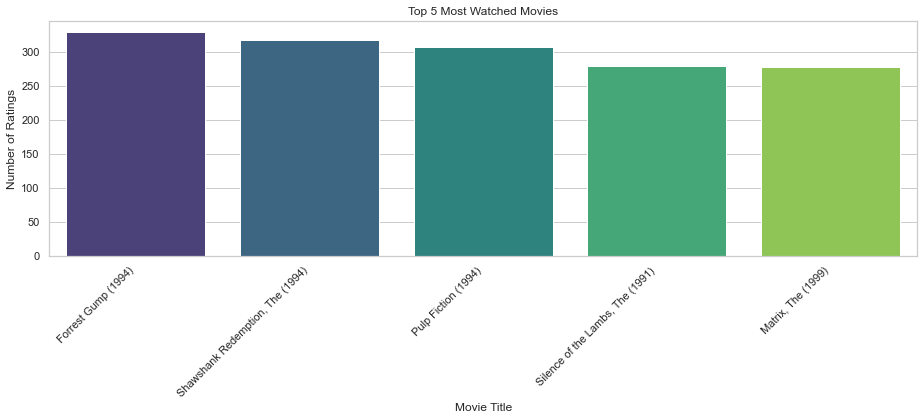

In [12]:
#Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head()

# Bar plot to show top watched movies using Seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=top_watched_movies.index, y=top_watched_movies.values, palette='viridis')
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### __Visualization of Highest Rated Movies__

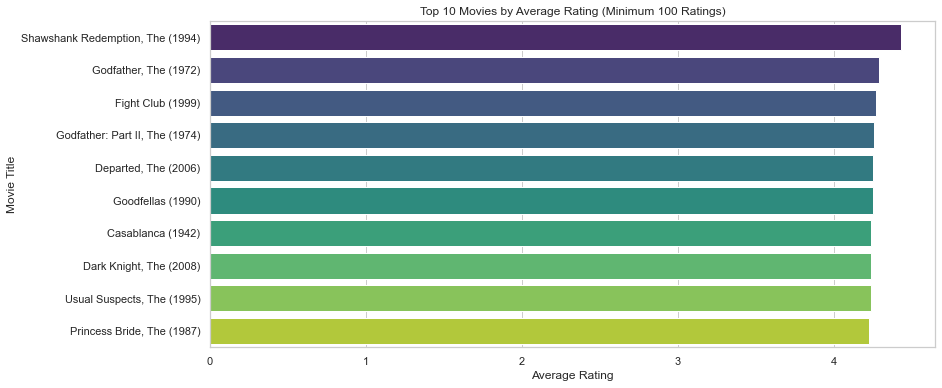

In [13]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(13, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating (Minimum 100 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


The bar graph represents a visualization of theTop 10 highest rated movies. It provides insights into user preferences and the popularity of specific films on the platform. By analyzing the ratings, stakeholders can identify the movies that resonate most positively with the audience. This information is valuable for content curation, marketing strategies, and potentially influencing future production decisions. Additionally, the visualization allows stakeholders to recognize trends or patterns in user preferences, contributing to a better understanding of the platform's content landscape and aiding decision-making processes for recommendations and promotions.

### __Top 10 Movies by Combined Metric (Most Watched and Highest Rated)__

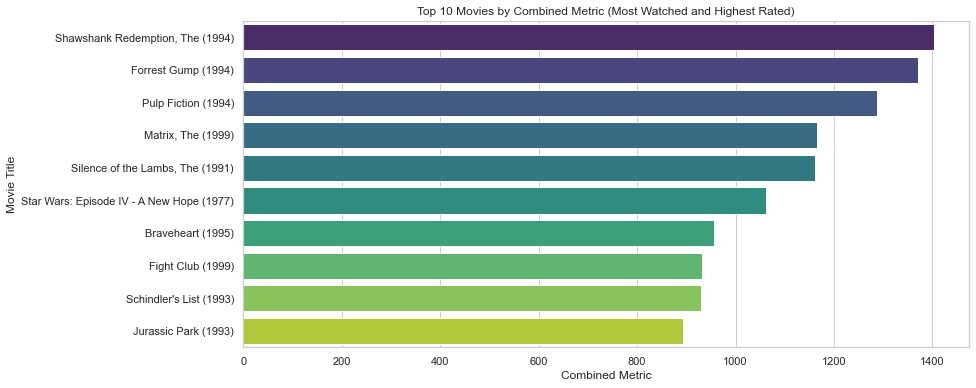

In [14]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Calculate a combined metric (e.g., weighted sum of average rating and log-transformed number of ratings)
filtered_data['combined_metric'] = filtered_data['rating'] * (filtered_data['num_ratings'].apply(lambda x: min(1, x / 100)))  # Adjust the weight as needed

# Sort the movies by the combined metric in descending order
sorted_movies = filtered_data.groupby('title')['combined_metric'].sum().reset_index()
sorted_movies = sorted_movies.sort_values(by='combined_metric', ascending=False)

# bar plot to visualize the top 10 movies by the combined metric
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=sorted_movies.head(10), palette="viridis")
plt.title("Top 10 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()


Creating a combined metric for the top 10 movies based on both the number of views and the highest ratings offers valuable insights into user preferences and overall popularity. The above visualization highlights movies that not only attract a significant audience but also manage to maintain high user satisfaction. The intersection of most-watched and highly-rated movies signifies a sweet spot where a film captures widespread attention while delivering a positive viewing experience. Stakeholders can use this information to identify blockbuster hits that resonate with a broad audience and potentially leverage these insights for marketing, content creation, or strategic decision-making. It also helps in understanding the correlation between popularity and user satisfaction, guiding future content recommendations and system improvements.

### __RECOMMENDATION SYSTEM GENERATION__

###  __Collaborative Filtering__

In [15]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy 
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate
import random
from scipy.sparse import csr_matrix
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV, cross_validate

In [16]:
# First lets create a Pivot matrix
rating = pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

data = pd.merge(rating, movies,  on='movieId')
data.info()


pivot_table = data.pivot_table(index='title',columns='userId',values='rating').fillna(0)
pivot_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_matrix = pivot_table.copy()

user_matrix.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.019396,0.053052,0.176911,0.120862,0.104406,0.143785,0.128542,0.055263,-0.000307,...,0.066248,0.149934,0.186959,0.056523,0.134402,0.121958,0.254192,0.262225,0.085430,0.098693
2,0.019396,1.000000,-0.002595,-0.003808,0.013181,0.016252,0.021564,0.023748,-0.003450,0.061877,...,0.198547,0.010885,-0.004038,-0.005348,-0.007923,0.011290,0.005809,0.032723,0.024371,0.089321
3,0.053052,-0.002595,1.000000,-0.004559,0.001886,-0.004581,-0.005637,0.001701,-0.003112,-0.005504,...,0.000148,-0.000588,0.011203,-0.004824,0.003674,-0.003255,0.012881,0.008089,-0.002964,0.015953
4,0.176911,-0.003808,-0.004559,1.000000,0.121014,0.065707,0.100595,0.054231,0.002412,0.015607,...,0.072841,0.114280,0.281852,0.039692,0.065483,0.164812,0.115109,0.116843,0.023926,0.062498
5,0.120862,0.013181,0.001886,0.121014,1.000000,0.294134,0.101721,0.426575,-0.004187,0.023468,...,0.061908,0.414929,0.095386,0.254115,0.141073,0.090149,0.145760,0.122600,0.258288,0.040361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.121958,0.011290,-0.003255,0.164812,0.090149,0.047476,0.172484,0.081904,0.057979,0.054858,...,0.153879,0.084190,0.224593,0.035234,0.106729,1.000000,0.115978,0.188312,0.052375,0.093788
607,0.254192,0.005809,0.012881,0.115109,0.145760,0.142158,0.173287,0.178130,0.003252,-0.004817,...,0.080027,0.187581,0.173008,0.126261,0.101129,0.115978,1.000000,0.258232,0.142529,0.098496
608,0.262225,0.032723,0.008089,0.116843,0.122600,0.137932,0.305429,0.175906,0.086221,0.048357,...,0.136304,0.174056,0.164440,0.133722,0.144878,0.188312,0.258232,1.000000,0.109556,0.248902


In [18]:
user_corr = user_matrix.T.corr()

collaborative filtering
    * memory based
    * model based
content based filtering

hybrid

conclusions
limitations
recommendations

In [19]:
target_user = range(5)

user_target = user_corr[target_user]

user_target_sorted = user_target.sort_values(ascending=False)

KeyError: "None of [Int64Index([0, 1, 2, 3, 4], dtype='int64', name='title')] are in the [columns]"

In [20]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

movie_features_df_matrix = csr_matrix(user_matrix.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [21]:
# reverse map using the pivot matrix
new_indices = {value: index for index, value in enumerate(user_matrix.index)}

In [22]:
# test
query_index = new_indices['Superman (1978)']
distances, indices = model_knn.kneighbors(user_matrix.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_matrix.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Superman (1978):

1: RoboCop (1987), with distance of 0.3711941943447822:
2: Superman II (1980), with distance of 0.4182346789524857:
3: Predator (1987), with distance of 0.43131950920483253:
4: Planet of the Apes (1968), with distance of 0.4560554017400201:
5: Star Trek II: The Wrath of Khan (1982), with distance of 0.4591074431717135:


In [23]:
reader = Reader(rating_scale=(1, 5))

expected_column_names = ["userId", "movieId", "rating"]

# Load the data into a Surprise Dataset
data_surp = Dataset.load_from_df(data[expected_column_names], reader)
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data_surp, n_jobs=-1)


# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline, data_surp)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [24]:
for i in cv_knn_baseline.items():
    print(i)
    
print('-----------------------')
# print validation results
np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.8736721 , 0.87759085, 0.8764392 , 0.87578556, 0.87826318]))
('test_mae', array([0.66495182, 0.67094815, 0.66912473, 0.67060438, 0.67008923]))
('fit_time', (2.3151204586029053, 1.5449442863464355, 1.5240614414215088, 1.6160991191864014, 1.4421355724334717))
('test_time', (5.607055902481079, 4.176259517669678, 3.5373101234436035, 2.9284393787384033, 3.6824703216552734))
-----------------------


0.8763501769420208

### __Model Based__

In [25]:
data = Dataset.load_from_df(data[['movieId', 'userId', 'rating']], reader)

In [26]:
reader = Reader(rating_scale=(0.5, 5))


random_seed = 42

#initialise svd
svd = SVD()

random.seed(random_seed)

results = cross_validate(svd, data, measures=['rmse', 'mae'], cv=5, verbose=True)

print(results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8741  0.8781  0.8753  0.8681  0.8858  0.8763  0.0058  
MAE (testset)     0.6709  0.6716  0.6751  0.6690  0.6810  0.6735  0.0042  
Fit time          7.48    6.34    6.69    8.26    9.17    7.59    1.03    
Test time         0.26    0.27    0.19    0.31    0.28    0.26    0.04    
{'test_rmse': array([0.87409274, 0.87814924, 0.87529951, 0.86810866, 0.88575169]), 'test_mae': array([0.6709082 , 0.6715508 , 0.67507808, 0.66904944, 0.6809979 ]), 'fit_time': (7.475326776504517, 6.33825421333313, 6.6939215660095215, 8.257837533950806, 9.169128656387329), 'test_time': (0.2618560791015625, 0.26726269721984863, 0.18849444389343262, 0.3121664524078369, 0.2792530059814453)}


In [27]:
#we split the data 
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
params = {'n_factors': [20, 50, 100],'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD, param_grid = params, n_jobs = -1)
g_s_svd.fit(data)
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8740452354437835, 'mae': 0.6732585221751911}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


In [29]:
# svd = SVD()

svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.05)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8847
0.8847458850475355


### __Content Based Filtering__

In [30]:
# import implicit
# import numpy as np
# import pandas as pd
# from scipy.sparse import coo_matrix
# # Create a sparse user-item matrix
# sparse_matrix = coo_matrix((data['movieId'], (data['userId'], data['rating'])))

# # Train the ALS model
# model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=50)
# model.fit(sparse_matrix.T)  # Transpose the matrix for item-based recommendations
# user_id = 1
# recommendations = model.recommend(user_id, sparse_matrix, N=5)
# item_factors = model.item_factor

In [31]:
data.info()

AttributeError: 'DatasetAutoFolds' object has no attribute 'info'

In [32]:
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")
sim_cos = {"name": "cosine", "user_based": False}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

Number of users:  8982 

Number of items:  610 

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9737
0.9736934188220899


In [33]:
sim_pearson = {"name": "pearson", "user_based": False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9720
0.9720029616726185


In [34]:
sim_pearson = {"name": "pearson", "user_based": False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8963
0.8962898476611199


In [35]:
sim_pearson = {"name": "pearson", "user_based": False}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8761
0.8760857970890734


In [36]:
sim_cosine = {"name": "cosine", "user_based": False}
knn_baseline = knns.KNNBaseline(sim_options=sim_cosine)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8798
0.8797839900543929
